# Making a dataset from given images


In [20]:
import os
import cv2
import numpy as np

data_dir = "archive\\Braille Dataset\\Braille Dataset"

data_array = os.listdir(data_dir)
exts_list = ['jpg', 'jpeg', 'png']

image_array = []
labels = []
lowercase_alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

count = 0
for img in data_array:
    try:
        ext = img.split('.')[-1].lower()
        if ext in exts_list:
            image_path = os.path.join(data_dir, img)
            image = cv2.imread(image_path)
            if image is not None:
                image_array.append(image)
                labels.append(lowercase_alphabets[count // 60])
                count += 1
            else:
                print(f"Failed to read {img}")
    except Exception as e:
        print(f"Error processing {img}: {e}")

image_array = np.array(image_array)

numerical_labels = [ord(label) - ord('a') for label in labels]

numerical_labels = np.array(numerical_labels)

labels = numerical_labels
print(f"Number of images: {len(image_array)}")
print(f"Number of labels: {len(labels)}")

print(image_array[0].shape)

Number of images: 1560
Number of labels: 1560
(28, 28, 3)


# Splitting the dataset into training and testing datasets


In [21]:
# print(f"{image_array[660]} and label {labels[660]}")
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(image_array, labels, test_size=0.2)

# print(len(X_train)/len(image_array))
# print(len(X_test)/len(image_array))
# print(len(y_train)/len(labels))
# print(len(y_test)/len(labels))

print(image_array[888].shape)

(28, 28, 3)


# Making the CNN model 

In [22]:
from keras import layers
from keras.models import Sequential
image_height=image_width=28

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((1, 1), padding='same'),  
    layers.Conv2D(256, (3, 3), activation='relu'),  
    layers.MaxPooling2D((1, 1), padding='same'),  
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(26, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 3, 3, 128)        

In [23]:
cnn = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
39/39 [==============================] - 1s 16ms/step - loss: 6.3326 - accuracy: 0.0569 - val_loss: 3.0487 - val_accuracy: 0.1378
Epoch 2/20
39/39 [==============================] - 1s 14ms/step - loss: 2.4648 - accuracy: 0.2893 - val_loss: 1.9398 - val_accuracy: 0.4167
Epoch 3/20
39/39 [==============================] - 1s 13ms/step - loss: 1.5630 - accuracy: 0.5288 - val_loss: 1.6073 - val_accuracy: 0.5353
Epoch 4/20
39/39 [==============================] - 1s 17ms/step - loss: 1.1219 - accuracy: 0.6643 - val_loss: 1.2097 - val_accuracy: 0.6282
Epoch 5/20
39/39 [==============================] - 1s 16ms/step - loss: 0.7894 - accuracy: 0.7532 - val_loss: 1.1757 - val_accuracy: 0.6506
Epoch 6/20
39/39 [==============================] - 1s 16ms/step - loss: 0.6026 - accuracy: 0.8189 - val_loss: 0.9891 - val_accuracy: 0.7276
Epoch 7/20
39/39 [==============================] - 1s 15ms/step - loss: 0.4848 - accuracy: 0.8438 - val_loss: 0.9007 - val_accuracy: 0.7404
Epoch 8/20
39

# Testing the CNN MODEL

In [24]:
cnn_test_loss, cnn_test_accuracy = model.evaluate(X_test, y_test)

print(f"CNN test accuracy : {cnn_test_accuracy*100:2f} %")

10/10 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.8526
CNN test accuracy : 85.256410 %


In [25]:
import matplotlib.pyplot as plt

def plot_sample(img, label_prediction, actual_label):
    plt.imshow(img)
    plt.xlabel(f"Predicted: {lowercase_alphabets[label_prediction]}")
    plt.title(f"Actual: {lowercase_alphabets[actual_label]}")
    plt.show()


312
10/10 [==============================] - 0s 5ms/step


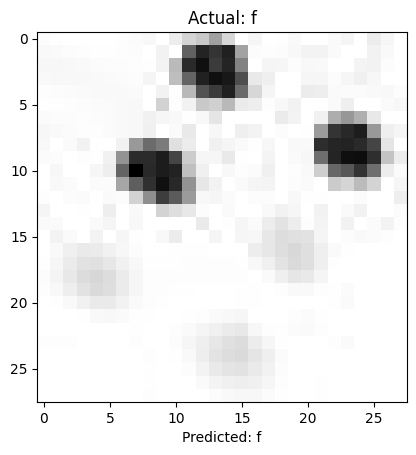

In [26]:
print(len(X_test))
y_pred = model.predict(X_test)
predictions = [np.argmax(element) for element in y_pred]

plot_sample(X_test[66], predictions[66], y_test[66])

(28, 28, 3)
1/1 [==============================] - 0s 16ms/step


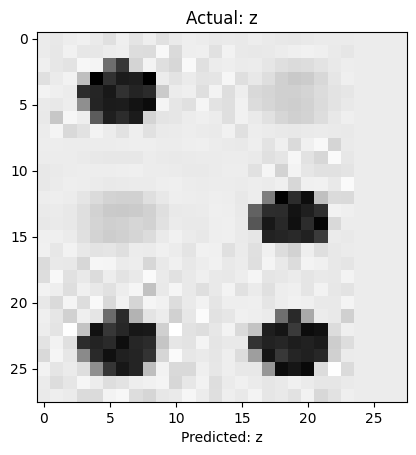

In [27]:
testing_image_path = "archive\\Braille Dataset\\Braille Dataset\\z1.JPG18dim.jpg"
testing_image = cv2.imread(testing_image_path)

print(testing_image.shape)

prediction = model.predict(np.array([testing_image]))

pred = [np.argmax(elt) for elt in prediction]

plot_sample(testing_image, pred[0], 25)

In [28]:
model.save('braille_detection_model.h5')

c:\Program Files\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


(28, 28, 3)
1/1 [==============================] - 0s 16ms/step


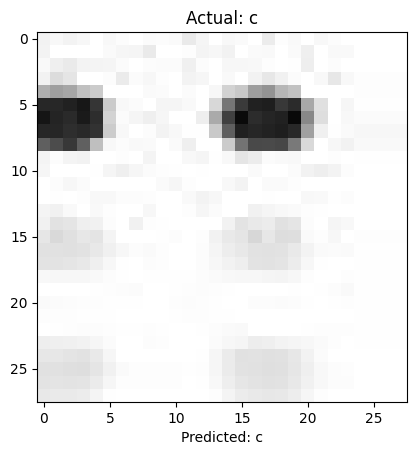

In [31]:
from keras.models import load_model

loaded_model = load_model('braille_detection_model.h5')

testing_image_path = "archive\\Braille Dataset\\Braille Dataset\\c1.JPG11whs.jpg"
testing_image = cv2.imread(testing_image_path)

print(testing_image.shape)

prediction = model.predict(np.array([testing_image]))

prediction = [np.argmax(elt) for elt in prediction]

plot_sample(testing_image, prediction[0], 2) #since c is the expected letter 